# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{BASE_URL}&q={city.replace(" ", "+")}'
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victorica
Processing Record 2 of Set 1 | afaahiti
Processing Record 3 of Set 1 | peel
Processing Record 4 of Set 1 | vung tau
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | kanungu
Processing Record 7 of Set 1 | guiuan
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | tsiombe
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | halifax
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | uaboe
City not found. Skipping...
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | gadzhiyevo
Processing Record 22 of 

Processing Record 40 of Set 4 | anadyr
Processing Record 41 of Set 4 | dalhart
Processing Record 42 of Set 4 | sabang
Processing Record 43 of Set 4 | nabire
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 46 of Set 4 | praia da vitoria
Processing Record 47 of Set 4 | changyon
Processing Record 48 of Set 4 | nogliki
Processing Record 49 of Set 4 | illizi
Processing Record 0 of Set 5 | simanggang
Processing Record 1 of Set 5 | sola
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | san pedro pochutla
Processing Record 4 of Set 5 | cumaribo
City not found. Skipping...
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set 5 | mansa
Processing Record 7 of Set 5 | inirida
Processing Record 8 of Set 5 | christchurch
Processing Record 9 of Set 5 | bengkulu
Processing Record 10 of Set 5 | kapuskasing
Processing Record 11 of Set 5 | sandakan
Processing Record 12 of Set 5 | jamestown

Processing Record 31 of Set 8 | aljezur
Processing Record 32 of Set 8 | patrocinio
Processing Record 33 of Set 8 | hami
Processing Record 34 of Set 8 | johi
Processing Record 35 of Set 8 | spassk
Processing Record 36 of Set 8 | gunnison
Processing Record 37 of Set 8 | remire-montjoly
Processing Record 38 of Set 8 | okha
Processing Record 39 of Set 8 | lorengau
Processing Record 40 of Set 8 | lubango
Processing Record 41 of Set 8 | taroa
Processing Record 42 of Set 8 | rincon
Processing Record 43 of Set 8 | puerto san jose
Processing Record 44 of Set 8 | tralee
Processing Record 45 of Set 8 | sandnessjoen
Processing Record 46 of Set 8 | polyarnyy
Processing Record 47 of Set 8 | khamis mushait
Processing Record 48 of Set 8 | lata
Processing Record 49 of Set 8 | nang rong
Processing Record 0 of Set 9 | alice springs
Processing Record 1 of Set 9 | flying fish cove
Processing Record 2 of Set 9 | beledweyne
Processing Record 3 of Set 9 | kulia village
City not found. Skipping...
Processing R

Processing Record 19 of Set 12 | campbell river
Processing Record 20 of Set 12 | chonchi
Processing Record 21 of Set 12 | bantogon
Processing Record 22 of Set 12 | palmital
Processing Record 23 of Set 12 | chateaubriant
Processing Record 24 of Set 12 | east honolulu
City not found. Skipping...
Processing Record 25 of Set 12 | weno
Processing Record 26 of Set 12 | howrah
Processing Record 27 of Set 12 | ketchikan
Processing Record 28 of Set 12 | tarko-sale
Processing Record 29 of Set 12 | saudarkrokur
Processing Record 30 of Set 12 | lautoka
Processing Record 31 of Set 12 | watseka
Processing Record 32 of Set 12 | tofol
Processing Record 33 of Set 12 | sao jose da coroa grande
Processing Record 34 of Set 12 | jiangzi
Processing Record 35 of Set 12 | pitimbu
Processing Record 36 of Set 12 | shakawe
Processing Record 37 of Set 12 | magadan
Processing Record 38 of Set 12 | kasongo-lunda
Processing Record 39 of Set 12 | northam
Processing Record 40 of Set 12 | mount airy
Processing Record 4

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,victorica,-36.2151,-65.4359,282.24,78,100,5.08,AR,1697684619
1,afaahiti,-17.7500,-149.2833,298.08,82,87,6.87,PF,1697684619
2,peel,-33.3167,149.6333,297.33,38,0,1.41,AU,1697684619
3,vung tau,10.3460,107.0843,301.76,76,97,1.56,VN,1697684620
4,port alfred,-33.5906,26.8910,289.36,97,11,2.23,ZA,1697684620


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,victorica,-36.2151,-65.4359,282.24,78,100,5.08,AR,1697684619
1,afaahiti,-17.7500,-149.2833,298.08,82,87,6.87,PF,1697684619
2,peel,-33.3167,149.6333,297.33,38,0,1.41,AU,1697684619
3,vung tau,10.3460,107.0843,301.76,76,97,1.56,VN,1697684620
4,port alfred,-33.5906,26.8910,289.36,97,11,2.23,ZA,1697684620


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

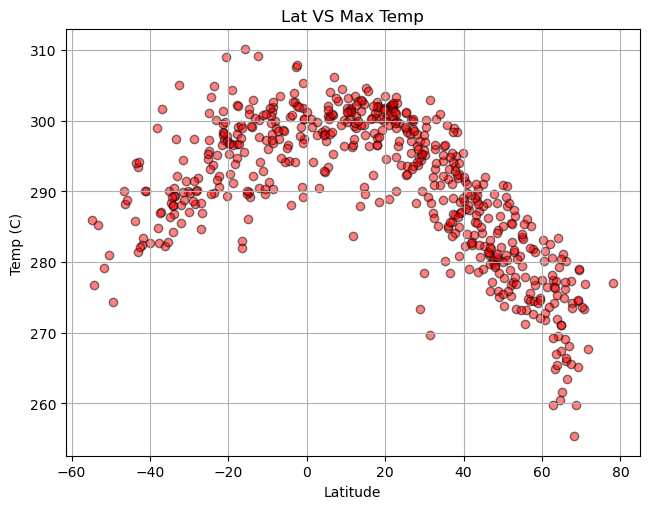

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", facecolors="red", edgecolors="black",alpha=.5,)
plt.tight_layout()

# Incorporate the other graph properties
plt.title("Lat VS Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temp (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

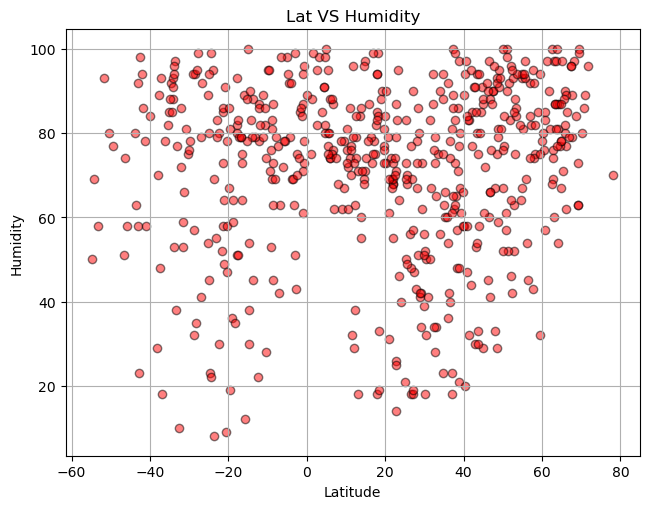

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black",alpha=.5,)
plt.tight_layout()

# Incorporate the other graph properties
plt.title("Lat VS Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figu
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

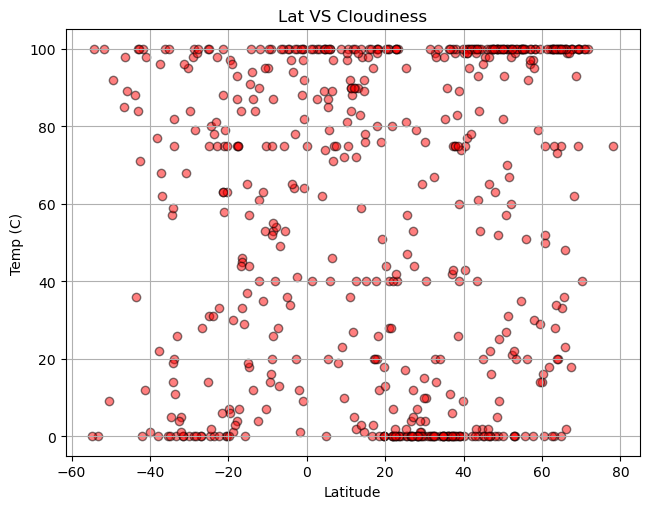

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black",alpha=.5,)
plt.tight_layout()

# Incorporate the other graph properties
plt.title("Lat VS Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Temp (C)")
plt.grid(True)
# Save the figu
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

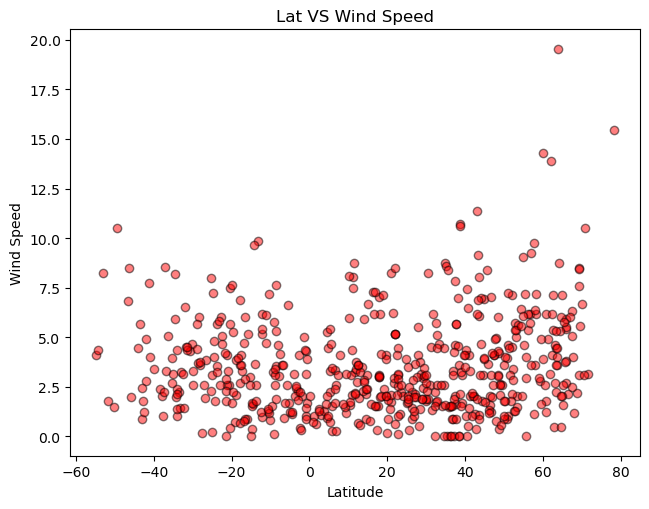

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black",alpha=.5,)
plt.tight_layout()

# Incorporate the other graph properties
plt.title("Lat VS Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,vung tau,10.3460,107.0843,301.76,76,97,1.56,VN,1697684620
6,guiuan,11.0333,125.7247,301.55,74,92,2.10,PH,1697684621
13,halifax,44.6453,-63.5724,284.15,91,2,3.09,CA,1697684564
16,isafjordur,66.0755,-23.1240,280.20,77,100,3.78,IS,1697684625
19,gadzhiyevo,69.2551,33.3362,274.54,63,100,8.48,RU,1697684628


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,victorica,-36.2151,-65.4359,282.24,78,100,5.08,AR,1697684619
1,afaahiti,-17.7500,-149.2833,298.08,82,87,6.87,PF,1697684619
2,peel,-33.3167,149.6333,297.33,38,0,1.41,AU,1697684619
4,port alfred,-33.5906,26.8910,289.36,97,11,2.23,ZA,1697684620
5,kanungu,-0.9575,29.7897,289.17,94,100,1.04,UG,1697684621


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is 0.64


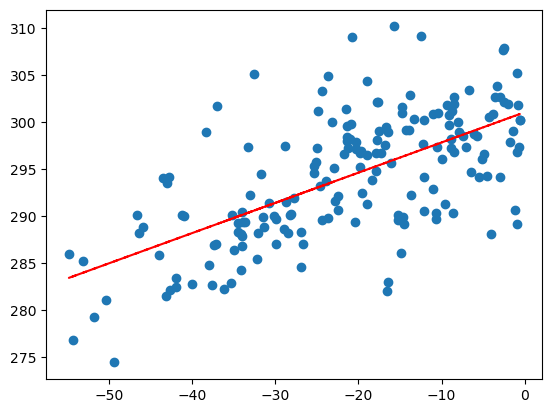

In [28]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))

The r-value between Lat and Max Temp is 0.64


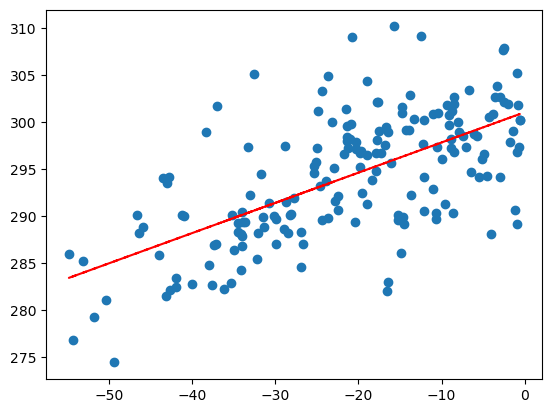

In [30]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-25, 5))

**Discussion about the linear relationship:** As seen in both 

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.07


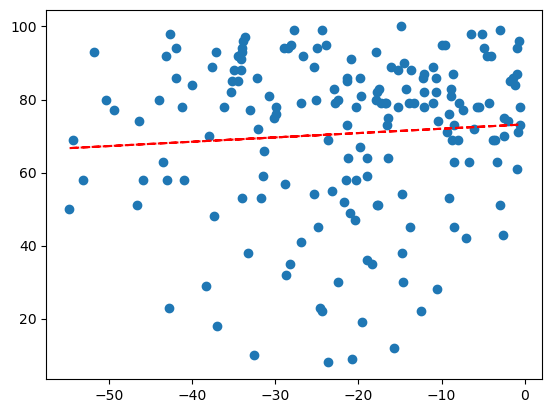

In [34]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(50, 10))

The r-value between Lat and Humidity is 0.07


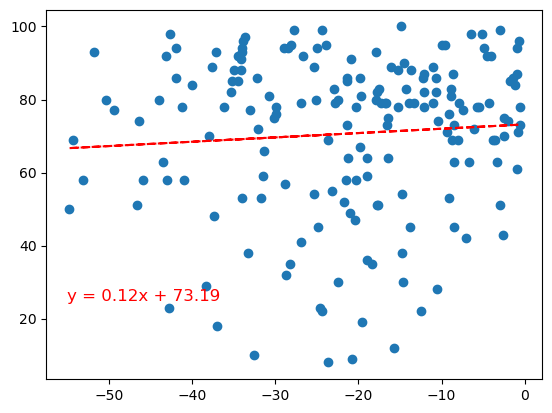

In [35]:
# Southern Hemisphere
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-55, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.1


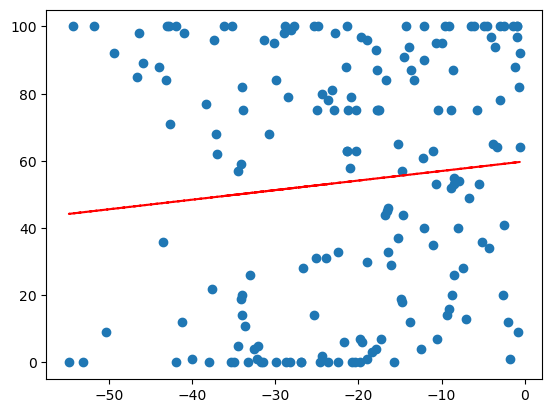

In [24]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))

The r-value between Lat and Cloudiness is 0.1


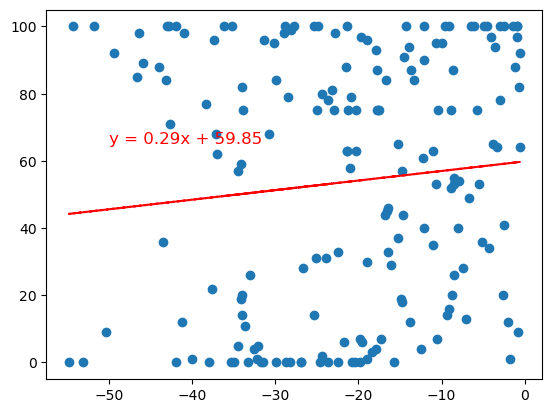

In [25]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is -0.21


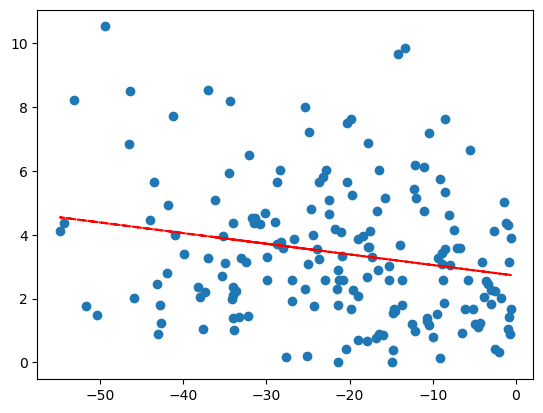

In [26]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))

The r-value between Lat and Wind Speed is -0.21


Text(0.5, 0, 'Hey')

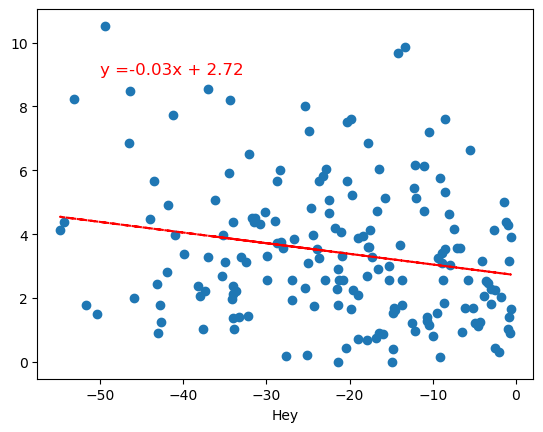

In [27]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel("Hey")

**Discussion about the linear relationship:** YOUR RESPONSE HERE